In [1]:
import warnings
from pathlib import Path

import pandas as pd

from synthius.metric.utils import utils
from synthius.utilities import MetricsAggregator

warnings.filterwarnings("ignore")

/storage/.dsw_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:matplotlib.font_manager:generated new fontManager
2025-11-05 13:48:54.928361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 13:48:56.091300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 13:48:56.091385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 13:48:57.603763: I tensorflow/core/platform/cp

In [2]:
train_data = Path("data/train.csv")  # TODO: Change this to the path of the training dataset (to generate synthetic data from)
test_data = Path("data/test.csv")  # TODO: Change this to the path of the test dataset (to generate syntehtic data from)
synt_path = Path("synthetic_data")  # TODO: Change this to the path of the synthetic data directory (for generated datasets)
models_path = Path("models")  # TODO: Change this to the path of the models directory (where you store the models trained!)
RESULTS_PATH = Path("results")  # TODO: Change this to the path of the results directory

synthetic_data_paths = [
    synt_path / "ARF.csv",
    synt_path / "CopulaGAN.csv",
    synt_path / "CTGAN.csv",
    synt_path / "GaussianCopula.csv",
    synt_path / "GaussianMultivariate.csv",
    synt_path / "TVAE.csv",
    # synt_path / "WGAN.csv", broken!
]


TARGET = "target_binary"  # TODO: Change this to the target column
POS_LABEL = 1  # TODO: Change this to the positive label
# If it's a binary classification problem, use TRUE without quotation marks
ID = None  # TODO: Change this to the ID column if exists

### Modify the key fields, sensitive fields, and auxiliary columns as per your data. Below is an example of how it should be used.

In [ ]:
key_fields = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
    "target",
    "target_binary",
]

sensitive_fields = ["petal width (cm)"]


aux_cols = [
    ["Occupation", "Education", "Education-num", "Hours-per-week", "Capital-loss", "Capital-gain"],
    ["Race", "Sex", "Fnlwgt", "Age", "Native-country", "Workclass", "Marital-status", "Relationship"],
]

In [4]:
# We make sure we use the clean columns from the data
inference_all_columns = utils.clean_columns(pd.read_csv(test_data)).columns

metrics_result = MetricsAggregator(
    real_data_path=train_data,
    synthetic_data_paths=synthetic_data_paths,
    control_data=test_data,
    key_fields=key_fields,
    sensitive_fields=sensitive_fields,
    distance_scaler="MinMaxScaler",
    singlingout_mode="multivariate",
    singlingout_n_attacks=6_000,
    singlingout_n_cols=7,
    linkability_n_neighbors=500,
    linkability_n_attacks=None,
    linkability_aux_cols=aux_cols,
    id_column=ID,
    utility_test_path=test_data,
    utility_models_path=models_path,
    # inference_all_columns=inference_all_columns,
    # inference_use_custom_model=True,
    # inference_sample_attacks=False,
    # inference_n_attacks=None,
    label_column=TARGET,
    pos_label=POS_LABEL,
    want_parallel=False,
    need_split=False,
)

INFO:sdv.metadata.single_table:Detected metadata:
INFO:sdv.metadata.single_table:{
    "columns": {
        "sepal length (cm)": {
            "sdtype": "numerical"
        },
        "sepal width (cm)": {
            "sdtype": "numerical"
        },
        "petal length (cm)": {
            "sdtype": "numerical"
        },
        "petal width (cm)": {
            "sdtype": "numerical"
        },
        "target": {
            "sdtype": "categorical"
        },
        "target_binary": {
            "sdtype": "categorical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}


## Choose the evaluation method

The `MetricsAggregator` class provides three distinct modes to evaluate metrics, depending on your use case. Below is a detailed explanation and examples for each mode:

### 1. Running Metrics for Synthetic Models Only

This mode calculates metrics exclusively for synthetic models, without involving the original dataset. Use this when you want to evaluate the performance or properties of your synthetic data independently.

```
metrics_result.run_metrics_for_models()
display(metrics_result.all_results)
```

### 2. Running Metrics for the Original Dataset Only

This mode calculates metrics for the original dataset by splitting train dataset into two equal parts (50-50 split). It is useful for benchmarking or validating your metrics.

```
metrics_result.run_metrics_for_original()
display(metrics_result.all_results)
```


### 3. Running Metrics for Both Synthetic Models and the Original Dataset

This mode evaluates metrics for both synthetic models and the original dataset.
```
metrics_result.run_all_with_original()
display(metrics_result.all_results)
```

### Update Existing Results with Original Dataset Values

If you want to update the results for synthetic models with the original dataset results without re-running all the metrics, follow these steps:

```
# Load the current results
metrics_result = MetricsAggregator.load_results(Path("res.pkl"))

# Run the calculation for the original dataset
metrics_result.run_metrics_for_original()

# Update the utility metric to include the original dataset results
metrics_result.run_or_update_metric("Utility")

# Display the updated results
display(metrics_result.all_results)
```



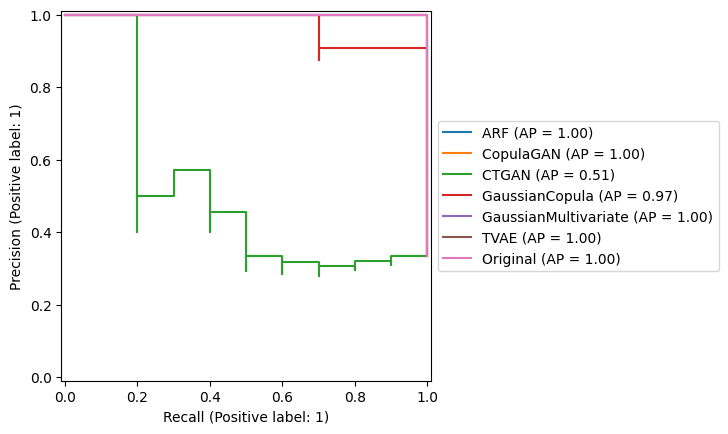

INFO:root:Utility Done
INFO:root:Basic Quality for ARF Done.
INFO:root:Basic Quality for CopulaGAN Done.
INFO:root:Basic Quality for CTGAN Done.
INFO:root:Basic Quality for GaussianCopula Done.
INFO:root:Basic Quality for GaussianMultivariate Done.
INFO:root:Basic Quality for TVAE Done.
INFO:root:Basic Done
INFO:synthius.metric.advanced_quality:Advanced Quality for ARF Done.
INFO:synthius.metric.advanced_quality:Advanced Quality for CopulaGAN Done.
INFO:synthius.metric.advanced_quality:Advanced Quality for CTGAN Done.
INFO:synthius.metric.advanced_quality:Advanced Quality for GaussianCopula Done.
INFO:synthius.metric.advanced_quality:Advanced Quality for GaussianMultivariate Done.
INFO:synthius.metric.advanced_quality:Advanced Quality for TVAE Done.
INFO:root:Advance Done
INFO:root:GM Log Likelihood for ARF Done.
INFO:root:BN Likelihood for ARF Done.
INFO:root:BN Log Likelihood for ARF Done.
INFO:root:GM Log Likelihood for CopulaGAN Done.
INFO:root:BN Likelihood for CopulaGAN Done.
INF

KeyboardInterrupt: 

In [5]:
metrics_result.run_all_with_original()
display(metrics_result.all_results)

In [ ]:
inference_all_columns = utils.clean_columns(pd.read_csv(test_data)).columns

metrics_result = MetricsAggregator(
    real_data_path=train_data,
    synthetic_data_paths=synthetic_data_paths,
    control_data=test_data,
    key_fields=key_fields,
    sensitive_fields=sensitive_fields,
    distance_scaler="MinMaxScaler",
    singlingout_mode="multivariate",
    singlingout_n_attacks=6_000,
    singlingout_n_cols=7,
    linkability_n_neighbors=500,
    linkability_n_attacks=None,
    linkability_aux_cols=aux_cols,
    id_column=ID,
    utility_test_path=test_data,
    utility_models_path=models_path,
    inference_all_columns=inference_all_columns,
    inference_use_custom_model=True,
    inference_sample_attacks=False,
    inference_n_attacks=None,
    label_column=TARGET,
    pos_label=POS_LABEL,
    want_parallel=False,
    need_split=False,
)